## Linear Regression
Load the housing_price.csv dataset to a DataFrame and perform the following tasks:

The dataset contains only numeric data, and the median house value column is our target variable, so with the help of linear regression, build a model that can predict accurate house prices. Perform the below tasks and build a model:


1.Load the housing_pricedataset  into DataFrame

2.Find the null value and drop then, If any

3.Split  data  into  two  DataFrames  x  and  y  based  on  dependent  and independent variables

4.Split x and y into 80% training set and 20% testing set. Set the random state to 10. Call the LinearRegression model, then fit the model  using train data 


5.Print the R2 value, coefficient, and intercept

6.Compare actual and predicted values.

7.Print the final summary   #OLS

In [1]:
from sklearn.datasets import fetch_california_housing

# Fetch the California housing dataset
california_housing = fetch_california_housing()

# Access data and target
X = california_housing.data
y = california_housing.target


In [2]:
import pandas as pd
df_x = pd.DataFrame(X, columns=california_housing.feature_names)

df_y = pd.DataFrame(y, columns=['Target'])

df = pd.concat([df_x, df_y], axis=1)

In [3]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [6]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [7]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score = ", r2)
print("Coefficient = ", lr_model.coef_)
print("Intercept = ", lr_model.intercept_)

R2 Score =  0.6009790143129117
Coefficient =  [ 4.33102288e-01  9.32362843e-03 -1.00332994e-01  6.15219176e-01
 -2.55110625e-06 -4.78180583e-03 -4.29077359e-01 -4.41484229e-01]
Intercept =  -37.486965765372716


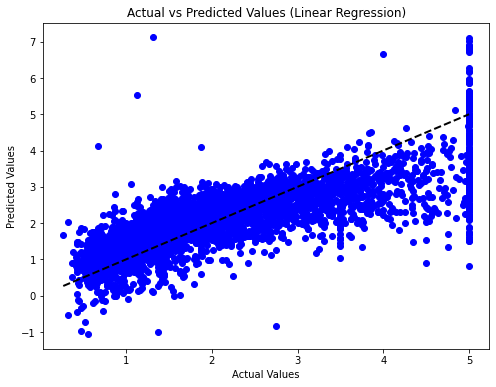

In [8]:
actual = y_test
predicted = y_pred
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.show()


In [9]:
import statsmodels.api as sm

# Assuming X_train and y_train are your training data
X_train_with_const = sm.add_constant(X_train) 
ols_model = sm.OLS(y_train, X_train_with_const)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     3192.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        09:37:36   Log-Likelihood:                -18023.
No. Observations:               16512   AIC:                         3.606e+04
Df Residuals:                   16503   BIC:                         3.613e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.4870      0.735    -50.992      0.0

## case study regression
Load the insurance.csvdataset into a DataFrame and follow given tasks, then build a good linear regression model.Data files contain data for different people having different weights and other detail, and how much they will be charged for their insurance.

1.Load the given dataset into a DataFrame 

2.Find null values and drop them if it is there

3.Find an Outlier and solve it using the interquartile range (IQR) method

4.Do one-hot encoding for categorical features

5.Split data into X (independent features) and Y(dependent features)

6.Build a simple Linear Regression model  and print the residual plot and r2 score for test data(take test size as 20%)

7.Find variance inflation factor and build a new model and note the r2score and print summary

8.Do Ridge and Lasso regression and print r2score for all models.


In [10]:
path = "C:\\Users\\alok\\Documents\\book\\Projects\\insurance\\insurance.csv"
insurance = pd.read_csv(path)

insurance.head(6)
insurance.shape

(1338, 7)

In [11]:
print(insurance.isnull().sum())
print(insurance.columns)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')


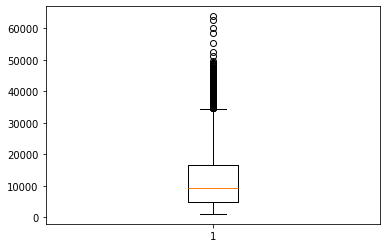

In [12]:
plt.boxplot(insurance.expenses)
plt.show()

c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

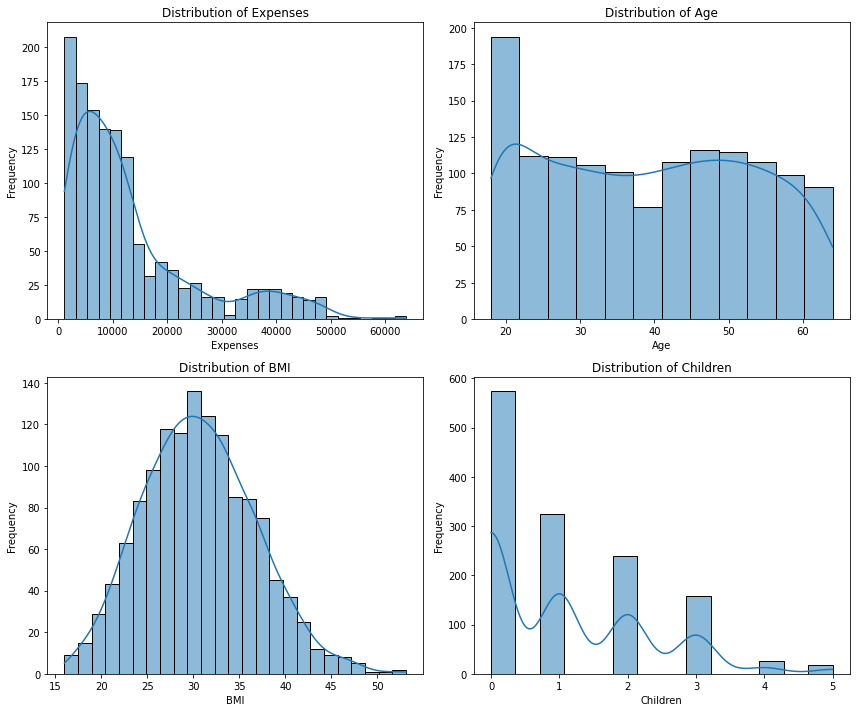

In [13]:
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# expenses
sns.histplot(insurance['expenses'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Expenses')
axes[0, 0].set_xlabel('Expenses')
axes[0, 0].set_ylabel('Frequency')

# age
sns.histplot(insurance['age'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Age')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# bmi
sns.histplot(insurance['bmi'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of BMI')
axes[1, 0].set_xlabel('BMI')
axes[1, 0].set_ylabel('Frequency')

# children
sns.histplot(insurance['children'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Children')
axes[1, 1].set_xlabel('Children')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [14]:
numeric_cols = ['age', 'bmi', 'children', 'expenses']
for col in numeric_cols:
    
    Q1 = insurance[col].quantile(0.25)
    Q3 = insurance[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr = insurance[(insurance[col] < Q1 - 1.5 * IQR) | (insurance[col] > Q3 + 1.5 * IQR)]
    print(f'Outliers detected using IQR method for {col}:\n{outliers_iqr}')

Outliers detected using IQR method for age:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, expenses]
Index: []
Outliers detected using IQR method for bmi:
      age     sex   bmi  children smoker     region  expenses
116    58    male  49.1         0     no  southeast  11381.33
286    46  female  48.1         2     no  northeast   9432.93
401    47    male  47.5         1     no  southeast   8083.92
543    54  female  47.4         0    yes  southeast  63770.43
847    23    male  50.4         1     no  southeast   2438.06
860    37  female  47.6         2    yes  southwest  46113.51
1047   22    male  52.6         1    yes  southeast  44501.40
1088   52    male  47.7         1     no  southeast   9748.91
1317   18    male  53.1         0     no  southeast   1163.46
Outliers detected using IQR method for children:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, expenses]
Index: []
Outliers detected using IQR method for expenses:
      age     sex   

In [15]:
categorical_cols = ['sex', 'smoker', 'region']

# Perform one-hot encoding
insurance_encoded = pd.get_dummies(insurance, columns=categorical_cols)

# Display the encoded DataFrame
print(insurance_encoded.head())

   age   bmi  children  expenses  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.9         0  16884.92        True     False      False        True   
1   18  33.8         1   1725.55       False      True       True       False   
2   28  33.0         3   4449.46       False      True       True       False   
3   33  22.7         0  21984.47       False      True       True       False   
4   32  28.9         0   3866.86       False      True       True       False   

   region_northeast  region_northwest  region_southeast  region_southwest  
0             False             False             False              True  
1             False             False              True             False  
2             False             False              True             False  
3             False              True             False             False  
4             False              True             False             False  


In [16]:

Q1 = insurance['expenses'].quantile(0.25)
Q3 = insurance['expenses'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

insurance_no_outliers = insurance[(insurance['expenses'] >= lower_bound) & (insurance['expenses'] <= upper_bound)]
insurance_no_outliers_encoded = insurance_encoded[(insurance_encoded['expenses'] >= lower_bound) & (insurance_encoded['expenses'] <= upper_bound)]


print(insurance_no_outliers)
print(insurance_no_outliers_encoded)

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1199 rows x 7 columns]
      age   bmi  children  expenses  sex_female  sex_male  smoker_no  \
0      19  27.9         0  16884.92        True     False      False   
1      18  33.8         1   1725.55       False      True       True   
2      28  33.0

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

X = insurance_encoded.drop('expenses', axis=1)  # Independent features
Y = insurance_encoded['expenses']               # Dependent feature

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)




R2 Score: 0.7835726930039906


In [18]:
X = insurance_no_outliers_encoded.drop('expenses', axis=1)  # Independent features
Y = insurance_no_outliers_encoded['expenses']               # Dependent feature

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

R2 Score: 0.5568224800819221


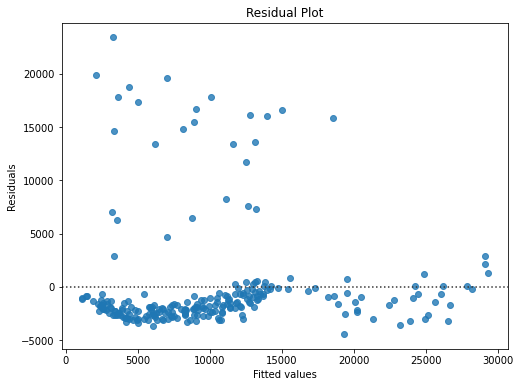

In [19]:
residuals = Y_test - Y_pred
plt.figure(figsize=(8, 6))
sns.residplot(data=insurance_no_outliers_encoded,x= Y_pred,y= residuals)
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [22]:
insurance.drop(categorical_cols).corr()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


KeyError: ('age', 'bmi', 'children', 'expenses')

**Variance inflation factor**

In [31]:
#X = insurance_encoded.drop('expenses', axis=1)
#Y = insurance_encoded['expenses'] 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso

def calculate_vif(X):
    numeric_cols = X.select_dtypes(include=[np.number]).columns
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_cols
    vif_data["VIF"] = [variance_inflation_factor(X[numeric_cols].values, i) for i in range(len(numeric_cols))]
    return vif_data

# VIF -independent features
vif = calculate_vif(X)
print("Variance Inflation Factor (VIF):\n", vif)




Variance Inflation Factor (VIF):
     Feature       VIF
0       age  7.526250
1       bmi  7.811534
2  children  1.764901


In [32]:
# new model after addressing multicollinearity
X_new = X.drop(columns=['sex_male', 'smoker_no', 'region_northeast'])  # Dropping one column from each category to address multicollinearity

X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y, test_size=0.2, random_state=42)

model_new = LinearRegression()
model_new.fit(X_train_new, Y_train_new)

Y_pred_new = model_new.predict(X_test_new)

r2_new = r2_score(Y_test_new, Y_pred_new)
print("R2 Score for new model after addressing multicollinearity:", r2_new)


R2 Score for new model after addressing multicollinearity: 0.5568224800819221


In [33]:
# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, Y_train)
ridge_Y_pred = ridge_model.predict(X_test)
ridge_r2 = r2_score(Y_test, ridge_Y_pred)
print("R2 Score for Ridge Regression:", ridge_r2)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, Y_train)
lasso_Y_pred = lasso_model.predict(X_test)
lasso_r2 = r2_score(Y_test, lasso_Y_pred)
print("R2 Score for Lasso Regression:", lasso_r2)

R2 Score for Ridge Regression: 0.5574400554205869
R2 Score for Lasso Regression: 0.5569299369709816


## Problem Statement: Logistic Regression

You  are  given  a  categorical  dataset –“Heart_Disease.csv.”Load  the dataset into a DataFrame. Considering the “TenYearCHD”column as the target variable, perform the  following tasks:

1.Explore the  “Heart_Disease.csv” dataset,  identify  the  null  values  and  fill them with the mean value of their respective columns

2.Split  the  data  into  test  and  train  parts  using train_test_split()function in 80:20 ratio (80% train, 20% test)

3.Perform scaling of numeric data using the StandardScaler()function

4.Build a Logistic  regression model using the test dataset and test the model using the test dataset

5.Print the classification report of the model

6.Calculate the confusion matrix and plot the same using a heatmap

7.Calculate and print the accuracy score of the model




In [37]:
path_to_heart ="C:\\Users\\alok\\Desktop\\Inzint\\datasets\\Heart_Disease.csv"
heart = pd.read_csv(path_to_heart)
print(heart.columns)
print(heart.isnull().sum())


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [38]:
heart = heart.fillna(heart.mean())
print(heart.isnull().sum())


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# 2. Split 
X = heart.drop('TenYearCHD', axis=1)
Y = heart['TenYearCHD']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 3. scaling of numeric data using the StandardScaler() function
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Logistic regression model 
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, Y_train)

# 5. classification report
Y_pred = logistic_model.predict(X_test_scaled)
classification_rep = classification_report(Y_test, Y_pred)
print("Classification Report:\n", classification_rep)


# 7. Calculate and print the accuracy score of the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy Score:", accuracy)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848

Accuracy Score: 0.8573113207547169


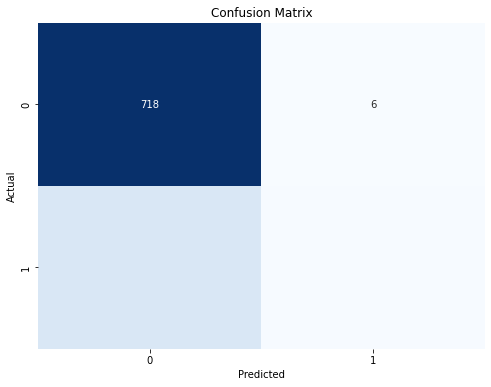

In [40]:
# 6. Calculate the confusion matrix and plot the same using a heatmap
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()